With sigma = 0.000, validError = 37948.91
With sigma = 0.000, validError = 37948.89
With sigma = 0.000, validError = 37901.38
With sigma = 0.000, validError = 37702.22
With sigma = 0.000, validError = 37447.07
With sigma = 0.001, validError = 36982.51
With sigma = 0.002, validError = 36643.30
With sigma = 0.004, validError = 34188.83
With sigma = 0.008, validError = 29835.65
With sigma = 0.016, validError = 23861.15
With sigma = 0.031, validError = 26476.93
With sigma = 0.063, validError = 232155.81
With sigma = 0.125, validError = 169156.59
With sigma = 0.250, validError = 12441.87
With sigma = 0.500, validError = 191.63
With sigma = 1.000, validError = 64.52
With sigma = 2.000, validError = 265.84
With sigma = 4.000, validError = 265.90
With sigma = 8.000, validError = 267.56
With sigma = 16.000, validError = 268.14
With sigma = 32.000, validError = 267.51
With sigma = 64.000, validError = 2295.97
With sigma = 128.000, validError = 2660.34
With sigma = 256.000, validError = 3640.26
W

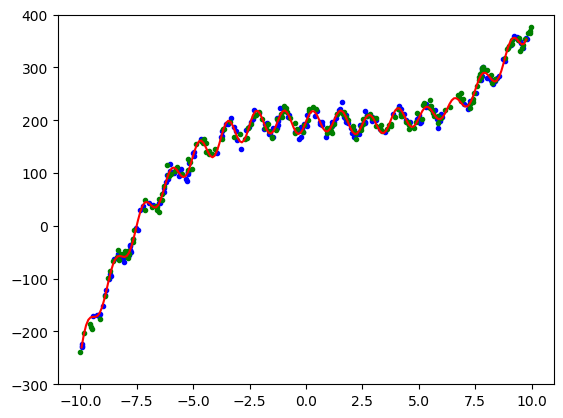

With best sigma of 1.000, testError = 71.18


(-300, 400)

In [9]:
using Printf
using Random

# Load X and y variable
using JLD
data = load("basisData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Data is sorted, so *randomly* split into train and validation:
n = size(X,1)
perm = randperm(n)
X=X[perm,:]
y=y[perm]





# Find best value of RBF variance parameter,
#	training on the train set and validating on the test set
include("leastSquares.jl")
minErr = Inf
bestSigma = []
nfold=10

for sigma in 2.0.^(-15:15)
	sumErr=0
    validErr=0
for i in 1:nfold
        validStart=Int64((n/nfold)*(i-1)+1)
        validEnd=Int64((n/nfold)*i)
        valid=validStart:validEnd
        train=setdiff(1:n,valid)
        
      
	# Train on the training set
	model = leastSquaresRBF(X[train,:],y[train],sigma,10^(-12))

	# Compute the error on the validation set
	yhat = model.predict(X[valid,:])
	validErr += sum((yhat - y[valid]).^2)
end
    validError=validErr/n
        @printf("With sigma = %.3f, validError = %.2f\n",sigma,validError)
    

	# Keep track of the lowest validation error
	
	if validError < minErr
		global minErr = validError
		global bestSigma = sigma
	end

end

# Now fit the model based on the full dataset
model = leastSquaresRBF(X,y,bestSigma,10^(-12))

# Report the error on the test set
t = size(Xtest,1)
yhat = model.predict(Xtest)
testError = sum((yhat - ytest).^2)/t
@printf("With best sigma of %.3f, testError = %.2f\n",bestSigma,testError)

# Plot model
using PyPlot
figure()
plot(X,y,"b.")
plot(Xtest,ytest,"g.")
Xhat = minimum(X):.1:maximum(X)
Xhat = reshape(Xhat,length(Xhat),1) # Make into an n by 1 matrix
yhat = model.predict(Xhat)
plot(Xhat,yhat,"r")
ylim((-300,400))


In [4]:
      2.0.^(-15:15)



31-element Array{Float64,1}:
     3.0517578125e-5
     6.103515625e-5 
     0.0001220703125
     0.000244140625 
     0.00048828125  
     0.0009765625   
     0.001953125    
     0.00390625     
     0.0078125      
     0.015625       
     0.03125        
     0.0625         
     0.125          
     ⋮              
    16.0            
    32.0            
    64.0            
   128.0            
   256.0            
   512.0            
  1024.0            
  2048.0            
  4096.0            
  8192.0            
 16384.0            
 32768.0            

In [12]:
using Statistics

# Load X and y variable
using JLD
data = load("logisticData.jld")
(X,y,Xtest,ytest) = (data["X"],data["y"],data["Xtest"],data["ytest"])

# Standardize columns and add bias
n = size(X,1)
include("misc.jl")
(X,mu,sigma) = standardizeCols(X)
X = [ones(n,1) X]

# Standardize columns of test data, using mean/std from train data
t = size(Xtest,1)
Xtest = standardizeCols(Xtest,mu=mu,sigma=sigma)
Xtest = [ones(t,1) Xtest]

# Fit logistic regression model
#include("leastSquares.jl")
include("logReg.jl")
#model = binaryLeastSquares(X,y)
model=logReg(X,y)
# Count number of non-zeroes in model
numberOfNonZero = sum(model.w .!= 0)
@show(numberOfNonZero)

# Compute training and validation error
yhat = model.predict(X)
trainError = mean(yhat .!= y)
@show(trainError)
yhat = model.predict(Xtest)
validError = mean(yhat .!= ytest)
@show(validError)


User and numerical derivatives agree
Backtracking
Backtracking
Backtracking
Backtracking
     1     4.72491e-02     2.06433e+02     2.11866e+01
     2     3.92532e-02     5.75468e+01     1.00189e+01
     3     2.96095e-02     2.72500e+01     8.69643e+00
     4     2.43376e-02     1.92787e+01     4.09251e+00
     5     2.76717e-02     1.65306e+01     2.62678e+00
     6     7.27270e-02     1.48840e+01     2.19912e+00
     7     1.15654e-01     1.23718e+01     1.24129e+00
     8     8.35542e-02     1.06939e+01     1.02576e+00
     9     3.09735e-02     1.01964e+01     1.48468e+00
    10     2.91093e-02     9.74869e+00     8.36714e-01
    11     5.18505e-02     9.57607e+00     7.40687e-01
    12     3.80860e-01     9.30237e+00     7.03919e-01
    13     4.47726e-01     7.85848e+00     5.35069e-01
    14     5.12262e-02     7.12535e+00     1.02454e+00
    15     3.44280e-02     6.88496e+00     6.56831e-01
    16     3.67468e-02     6.76587e+00     4.95980e-01
    17     8.59505e-02     6.70

0.082

In [13]:
y=[1,2,3]
yy=[1,2,3]
output=y.*yy

3-element Array{Int64,1}:
 1
 4
 9